Figure 3  

Average Number of Flashes Perceived by Task and Condition

In [1]:
# Custom imports
import importlib
import plotting
importlib.reload(plotting)
from plotting import Plots
plotting = Plots()

import get_df
importlib.reload(get_df)
from get_df import get_df
data_frame = get_df()

In [2]:
# Plot accuracy heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_participants_df = pd.read_csv('csv/all_participants.csv')
all_participants_df['condition'] = 'F' + all_participants_df['n_flash'].astype(int).astype(str) + 'B' + all_participants_df['n_beep'].astype(int).astype(str)

c:\Users\Ailene\miniconda3\envs\illusory-mapping\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Ailene\miniconda3\envs\illusory-mapping\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ailene\AppData\Local\Temp\ipykernel_25748\1898586145.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.1, 0.03, 1, 0.95])
c:\Users\Ailene\miniconda3\envs\illusory-mapping\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


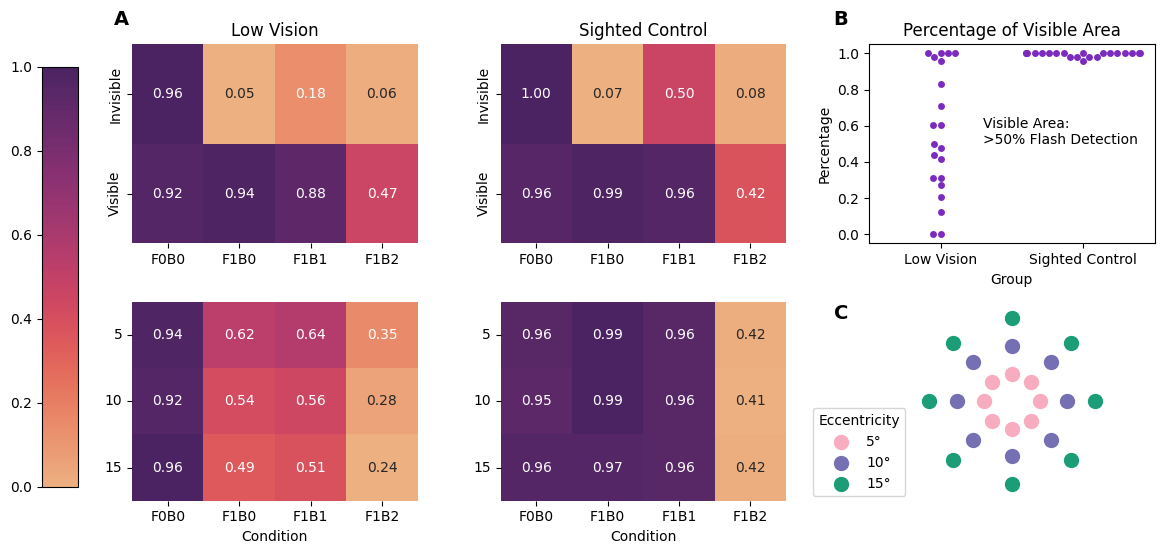

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = ax.flatten()

groups = all_participants_df['group'].unique()

df = all_participants_df
cmap='flare'

# By visibility
for i, group in enumerate(['Low Vision','Sighted Control']):
    group_df = df[df['group'] == group]
    group_df = group_df.query("visibility != 'unknown'")

    heatmap_data = group_df.pivot_table(index='visibility', columns='condition', values='accuracy')
        
    condition_order = ['F0B0', 'F1B0', 'F1B1', 'F1B2']
    heatmap_data = heatmap_data[condition_order]
        
    sns.heatmap(
        heatmap_data, 
        ax=axes[i], 
        annot=True,
        fmt=".2f",
        cmap=cmap,
        cbar=False
    )
    axes[i].set_title(group)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Percentage of visible area
visibility_df = data_frame.visibility()
visibility_df = visibility_df.groupby(['group', 'sid'], observed=True)['vis_area_perc'].agg(['mean'])

sns.swarmplot(
    visibility_df,
    ax=axes[2],
    x='group',
    y='mean',
    color='#7b2cbf',
    # dodge=True,
    # jitter=0.1,
    # alpha=0.5
)
axes[2].set_title('Percentage of Visible Area')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Percentage')
axes[2].text(0.3, 0.5, "Visible Area:\n>50% Flash Detection", ha='left')

# By eccentricity
for i, group in enumerate(['Low Vision','Sighted Control']):
    i+=3
    group_df = df[df['group'] == group]

    heatmap_data = group_df.pivot_table(index='deg', columns='condition', values='accuracy')
        
    condition_order = ['F0B0', 'F1B0', 'F1B1', 'F1B2']
    heatmap_data = heatmap_data[condition_order]
        
    sns.heatmap(
        heatmap_data, 
        ax=axes[i], 
        annot=True,
        fmt=".2f",
        cmap=cmap,
        cbar=False
    )
    axes[i].set_xlabel('Condition')
    axes[i].set_yticklabels([5, 10, 15], rotation=0)
    axes[i].set_ylabel('')

# polar plot to show eccentricity
ax_to_replace = axes[-1]
ax_to_replace.remove()
axes[-1] = fig.add_subplot(2, 3, 6, projection='polar')
plotting.polar_schematics(axes[-1], color_code=True)


cax = fig.add_axes([0.06, 0.15, 0.03, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.yaxis.set_label_position('left')
# cbar.set_label('Mean Accuracy', rotation=90, labelpad=15)

# Add labels
top_y, bottom_y = 0.92, 0.43
col1, col2 = 0.12, 0.72
fontsize = 14
plt.gcf().text(col1, top_y, "A", fontweight='bold', fontsize=fontsize)
plt.gcf().text(col2, top_y, "B", fontweight='bold', fontsize=fontsize)
plt.gcf().text(col2, bottom_y, "C", fontweight='bold', fontsize=fontsize)
plt.tight_layout(rect=[0.1, 0.03, 1, 0.95])
# fig.suptitle('Mean Accuracy of Perceiving Flashes', fontweight='bold')



In [4]:
accuracy_df = (
    all_participants_df
    .groupby(['group', 'sid', 'condition', 'visibility'], observed=True)['accuracy']
    .mean()
    .reset_index()
)
accuracy_df

,group,sid,condition,visibility,accuracy
0,Low Vision,LV001,F0B0,Invisible,0.969697
1,Low Vision,LV001,F0B0,Visible,1.000000
2,Low Vision,LV001,F1B0,Invisible,0.024242
3,Low Vision,LV001,F1B0,Visible,0.893333
4,Low Vision,LV001,F1B1,Invisible,0.000000
...,...,...,...,...,...
243,Sighted Control,SV215,F1B2,Visible,0.193617
244,Sighted Control,SV216,F0B0,Visible,1.000000
245,Sighted Control,SV216,F1B0,Visible,0.991667
246,Sighted Control,SV216,F1B1,Visible,1.000000


In [5]:
import statsmodels.formula.api as smf

model = smf.mixedlm(
    "accuracy ~ group * condition * visibility",
    data=accuracy_df,
    groups=accuracy_df["sid"]
).fit()
print(model.summary())


                                   Mixed Linear Model Regression Results
Model:                              MixedLM                   Dependent Variable:                   accuracy
No. Observations:                   248                       Method:                               REML    
No. Groups:                         42                        Scale:                                0.0422  
Min. group size:                    4                         Log-Likelihood:                       4.9343  
Max. group size:                    8                         Converged:                            Yes     
Mean group size:                    5.9                                                                     
------------------------------------------------------------------------------------------------------------
                                                                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------

c:\Users\Ailene\miniconda3\envs\illusory-mapping\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [6]:
accuracy_df = (
    all_participants_df
    .groupby(['group', 'sid', 'condition', 'deg'], observed=True)['accuracy']
    .mean()
    .reset_index()
)
model = smf.mixedlm(
    "accuracy ~ group * condition * deg",
    data=accuracy_df,
    groups=accuracy_df["sid"]
).fit()
print(model.summary())

                          Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            accuracy
No. Observations:              504                Method:                        REML    
No. Groups:                    42                 Scale:                         0.0393  
Min. group size:               12                 Log-Likelihood:                9.0137  
Max. group size:               12                 Converged:                     Yes     
Mean group size:               12.0                                                      
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                       0.921    0.075 12.282 0.000  0.774  1.068
group[T.Sighted Control]            